<a href="https://colab.research.google.com/github/donosonahuel/tendencias-historica-videojuegos/blob/main/An%C3%A1lisis_de_Tendencias_y_Ventas_Hist%C3%B3ricas(Videojuegos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📂 Adquisición y Comprensión del Dataset

## Importando biblioteca y archivo

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd

In [2]:
df_video_games_sales = pd.read_csv('/content/vgsales.csv')

## Inspección del DataSet

In [3]:
df_video_games_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df_video_games_sales.info() # Se puede identificar que falta datos en "Year" y "Publisher", y cambiar los objetos de "Name", "Platform", "Genre", "Year" y "Publisher" a string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df_video_games_sales.isnull().sum() # Se obtuvo la cantidad exacta de nulos.

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# 🧼 Limpieza y Preparación de Datos (Data Wrangling)

## Rellenar los espacios nulos

In [6]:
# Imputacion de datos en la columna "Publisher"
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].fillna('Unknown')

In [7]:
# Encontrar la media de los años en la columna "Year"
media_year = df_video_games_sales['Year'].mean()

# Imputación de datos en la columna "Year"
df_video_games_sales['Year'] = df_video_games_sales['Year'].fillna(media_year).round(0).astype(int)

# La media calculada en la columna 'Year' es 2006.4064433147546 redondeando el resultado a un tipo entero
# Haciendo esto minimiza la distorsion y mantiene la tendencia central

In [8]:
df_video_games_sales.isnull().sum() # Ya se han rellenado todos los campos

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Aplicar los tipos correctos de datos

In [9]:
# Todo la información en minuscula y el tipo de dato en String
df_video_games_sales['Name'] = df_video_games_sales['Name'].astype('string').str.lower()
df_video_games_sales['Platform'] = df_video_games_sales['Platform'].astype('string').str.lower()
df_video_games_sales['Genre'] = df_video_games_sales['Genre'].astype('string').str.lower()
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].astype('string').str.lower()

In [10]:
# Todo la información en tipo numero entero
df_video_games_sales['Year'] = df_video_games_sales['Year'].astype(int)

In [11]:
# Visualizacion de la tabla
df_video_games_sales.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16207,16210,duel love: koisuru otome wa shouri no megami,ds,2008,adventure,namco bandai games,0.00,0.00,0.01,0.00,0.01
2606,2608,motocross mania,ps,2001,racing,take-two interactive,0.44,0.30,0.00,0.05,0.79
2558,2560,final fantasy xi: wings of the goddess,ps2,2007,role-playing,square enix,0.35,0.27,0.09,0.09,0.81
11153,11155,harvey birdman: attorney at law,wii,2008,adventure,capcom,0.08,0.00,0.00,0.01,0.09
5824,5826,midtown madness 3,xb,2003,racing,microsoft game studios,0.23,0.07,0.00,0.01,0.30
8974,8976,motogp 2: ultimate racing technology,ps2,2001,racing,sony computer entertainment,0.07,0.06,0.00,0.02,0.15
14261,14264,sbk 2011: fim superbike world championship,pc,2011,racing,black bean games,0.00,0.03,0.00,0.01,0.03
2629,2631,yars' revenge,2600,1982,shooter,atari,0.73,0.04,0.00,0.01,0.78
1009,1011,disney's aladdin,snes,1993,platform,capcom,0.94,0.34,0.21,0.27,1.75
8720,8722,the oregon trail,wii,2011,simulation,crave entertainment,0.15,0.00,0.00,0.01,0.15


In [12]:
# Revision de los datos
df_video_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  string 
 2   Platform      16598 non-null  string 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  string 
 5   Publisher     16598 non-null  string 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), string(4)
memory usage: 1.4 MB


# 📈 Análisis Exploratorio de Datos (EDA) y Visualización

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

## Género Más Vendido a Nivel Global

In [14]:
# Agrupar por "Genre" y sumar "Global_Sales"
genre_sales = df_video_games_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)

# Convertir en un dataframe
df_genre_sales = genre_sales.reset_index()
df_genre_sales.columns = ['Genre', 'Global_Sales']
df_genre_sales['Percentage'] = (df_genre_sales['Global_Sales'] / df_genre_sales['Global_Sales'].sum()) * 100
df_genre_sales['Percentage'] = df_genre_sales['Percentage'].round(2)

# Mostrar las categorias principales a nivel global
print("Los generos vendidos a nivel global:")
print(df_genre_sales)

Los generos vendidos a nivel global:
           Genre  Global_Sales  Percentage
0         action       1751.18       19.63
1         sports       1330.93       14.92
2        shooter       1037.37       11.63
3   role-playing        927.37       10.40
4       platform        831.37        9.32
5           misc        809.96        9.08
6         racing        732.04        8.21
7       fighting        448.91        5.03
8     simulation        392.20        4.40
9         puzzle        244.95        2.75
10     adventure        239.04        2.68
11      strategy        175.12        1.96


### Gráfico de ventas por género

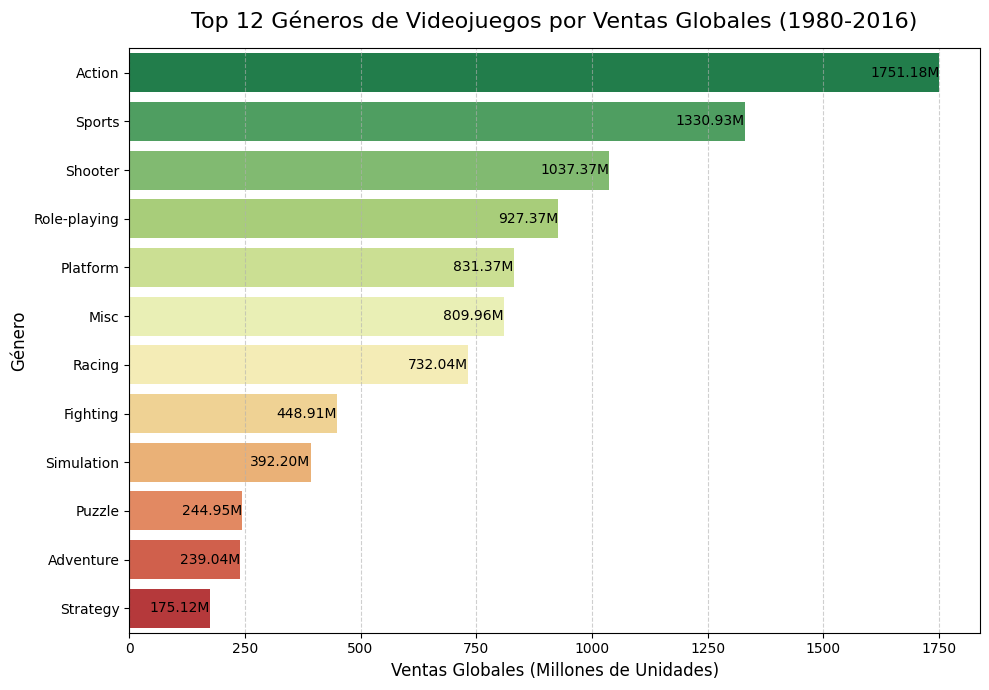

In [15]:
# Creando el grafico de barras(horizontal) con Seaborn
df_genre_sales['Genre'] = df_genre_sales['Genre'].str.capitalize()

palette = sns.color_palette("RdYlGn_r", n_colors=len(df_genre_sales))

plt.figure(figsize=(10, 7))

sns.barplot(
    x='Global_Sales',
    y='Genre',
    data=df_genre_sales,
    palette=palette,
    hue='Genre',
    legend=False
)

plt.title('Top 12 Géneros de Videojuegos por Ventas Globales (1980-2016)', fontsize=16, pad=15)
plt.xlabel('Ventas Globales (Millones de Unidades)', fontsize=12)
plt.ylabel('Género', fontsize=12)

# Mostrar el valor exacto de las ventas en cada barra (etiquetas de datos)
for index, row in df_genre_sales.iterrows():
    plt.text(
        row['Global_Sales'],
        index,
        f'{row["Global_Sales"]:.2f}M',
        color='black',
        ha="right",
        va="center"
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Editor Más Consumido a Nivel Global

In [16]:
# Agrupar por "Publisher" y sumar por "Global_Sales"
publisher_sales = df_video_games_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False)

# Visualizar los datos de las empresas mas consumidas
top_10_publishers = publisher_sales.head(10).reset_index()
top_10_publishers.columns = ['Publisher', 'Global_Sales']
print("Las 10 empresas mas consumidas a nivel global:")
print(top_10_publishers)

Las 10 empresas mas consumidas a nivel global:
                      Publisher  Global_Sales
0                      nintendo       1786.56
1               electronic arts       1110.32
2                    activision        727.46
3   sony computer entertainment        607.50
4                       ubisoft        474.72
5          take-two interactive        399.54
6                           thq        340.77
7  konami digital entertainment        283.64
8                          sega        272.99
9            namco bandai games        254.09


### Grafico de consumo por empresa(Top 10)

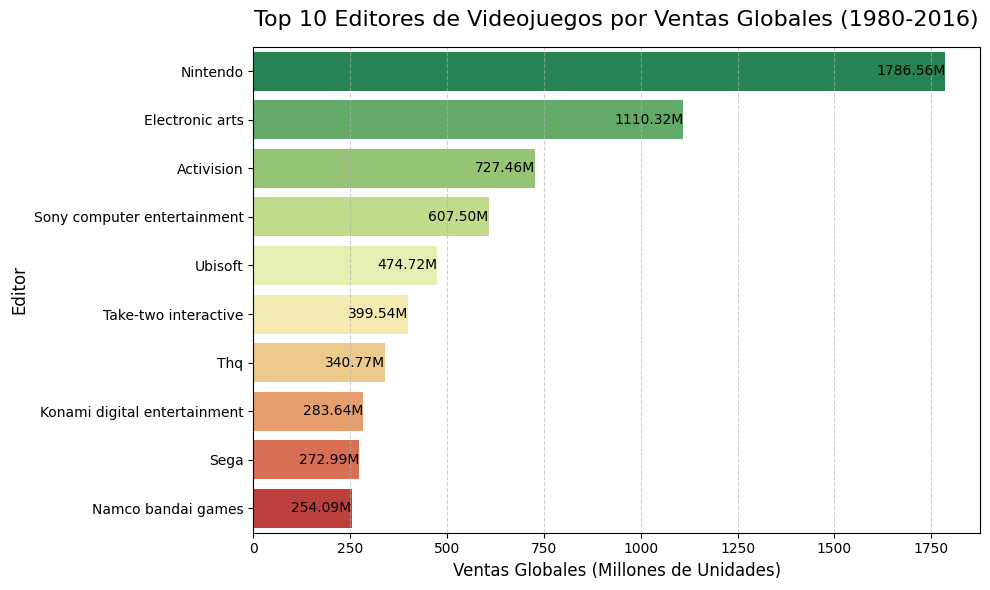

In [17]:
# Creando el grafico de barras(horizontal) con Seaborn
top_10_publishers['Publisher'] = top_10_publishers['Publisher'].str.capitalize()

palette_pub = sns.color_palette("RdYlGn_r", n_colors=len(top_10_publishers))

plt.figure(figsize=(10, 6))

# Crear el gráfico de barras HORIZONTAL con Seaborn
sns.barplot(
    x='Global_Sales',
    y='Publisher',
    data=top_10_publishers,
    palette=palette_pub,
    hue='Publisher',
    legend=False
)


plt.title('Top 10 Editores de Videojuegos por Ventas Globales (1980-2016)', fontsize=16, pad=15)
plt.xlabel('Ventas Globales (Millones de Unidades)', fontsize=12)
plt.ylabel('Editor', fontsize=12)

# Mostrar el valor exacto de las ventas en cada barra (etiquetas de datos)
for index, row in top_10_publishers.iterrows():
    plt.text(
        row['Global_Sales'],
        index,
        f'{row["Global_Sales"]:.2f}M',
        color='black',
        ha="right",
        va="center"
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ventas Global en años pares/impares

In [18]:
# Agrupar por "Year" y sumar por "Global_Sales"
df_sales_by_year = df_video_games_sales.groupby('Year')['Global_Sales'].sum().reset_index()

# Se filtra el rango historico
df_sales_by_year = df_sales_by_year[(df_sales_by_year['Year'] >= 1980) & (df_sales_by_year['Year'] <= 2016)]

# Se crea la columna para identificar los años impares de los pares
df_sales_by_year['Year_Type'] = df_sales_by_year['Year'].apply(lambda x: 'Even' if x % 2 == 0 else 'Odd')

# Visualizar los datos de los años de mas consumo
print("Ventas global por año:")
print(df_sales_by_year)

Ventas global por año:
    Year  Global_Sales Year_Type
0   1980         11.38      Even
1   1981         35.77       Odd
2   1982         28.86      Even
3   1983         16.79       Odd
4   1984         50.36      Even
5   1985         53.94       Odd
6   1986         37.07      Even
7   1987         21.74       Odd
8   1988         47.22      Even
9   1989         73.45       Odd
10  1990         49.39      Even
11  1991         32.23       Odd
12  1992         76.16      Even
13  1993         45.98       Odd
14  1994         79.17      Even
15  1995         88.11       Odd
16  1996        199.15      Even
17  1997        200.98       Odd
18  1998        256.47      Even
19  1999        251.27       Odd
20  2000        201.56      Even
21  2001        331.47       Odd
22  2002        395.52      Even
23  2003        357.85       Odd
24  2004        419.31      Even
25  2005        459.94       Odd
26  2006        621.12      Even
27  2007        611.13       Odd
28  2008        678.

### Grafico de tendencia en ventas por año

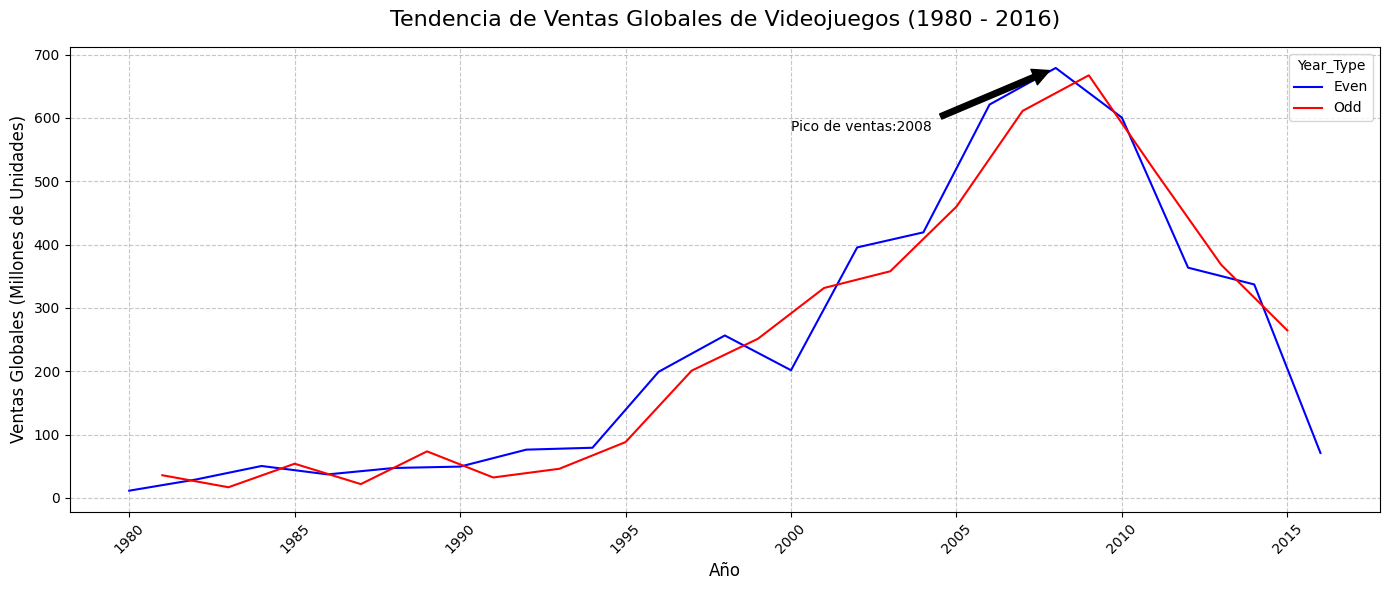

In [19]:
# Grafico de linea de tendencia
plt.figure(figsize = (14, 6))

sns.lineplot(
    x = 'Year',
    y = 'Global_Sales',
    data = df_sales_by_year,
    hue = 'Year_Type',
    palette = ['blue', 'red'],
    legend = 'full'
)

plt.title('Tendencia de Ventas Globales de Videojuegos (1980 - 2016)', fontsize = 16, pad = 15)
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Ventas Globales (Millones de Unidades)', fontsize = 12)
plt.xticks(rotation = 45)

# Anotando el pico clave en la linea
peak_year = df_sales_by_year.loc[df_sales_by_year['Global_Sales'].idxmax()]

plt.annotate(
    f'Pico de ventas:{int(peak_year['Year'])}',
    xy = (peak_year['Year'], peak_year['Global_Sales']),
    xytext = (peak_year['Year'] - 8, peak_year['Global_Sales'] - 100),
    arrowprops = dict(facecolor = 'black', shrink = 0.05)
)

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## La consola dominante en periodos de años

In [20]:
# Definir los años
min_year = int(df_video_games_sales['Year'].min())
max_year = int(df_video_games_sales['Year'].max())
print(f"Periodo de años: {min_year} - {max_year}")

# Creando rangos de 5 años
bins = range(min_year, max_year + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Creando la columna "Period"
df_video_games_sales['Period'] = pd.cut(df_video_games_sales['Year'], bins = bins, labels = labels, right = False)

# Agrupando "Period" con "Platform"
platform_period_sales = df_video_games_sales.groupby(['Period', 'Platform'])['Global_Sales'].sum().reset_index()

# Encontrando el ganador entre las consolas en cada periodo
dominant_platform = platform_period_sales.loc[platform_period_sales.groupby('Period')['Global_Sales'].idxmax()]

# Visualizar el resultado
print("\nConsola Dominante por Periodo (5 años): ")
print(dominant_platform)


Periodo de años: 1980 - 2020

Consola Dominante por Periodo (5 años): 
        Period Platform  Global_Sales
0    1980-1984     2600         82.11
42   1985-1989      nes        162.47
85   1990-1994     snes        150.44
108  1995-1999       ps        580.83
140  2000-2004      ps2        807.01
180  2005-2009      wii        694.38
203  2010-2014      ps3        581.63
235  2015-2019      ps4        154.58


### Grafico de periodo de tiempo para cada consola

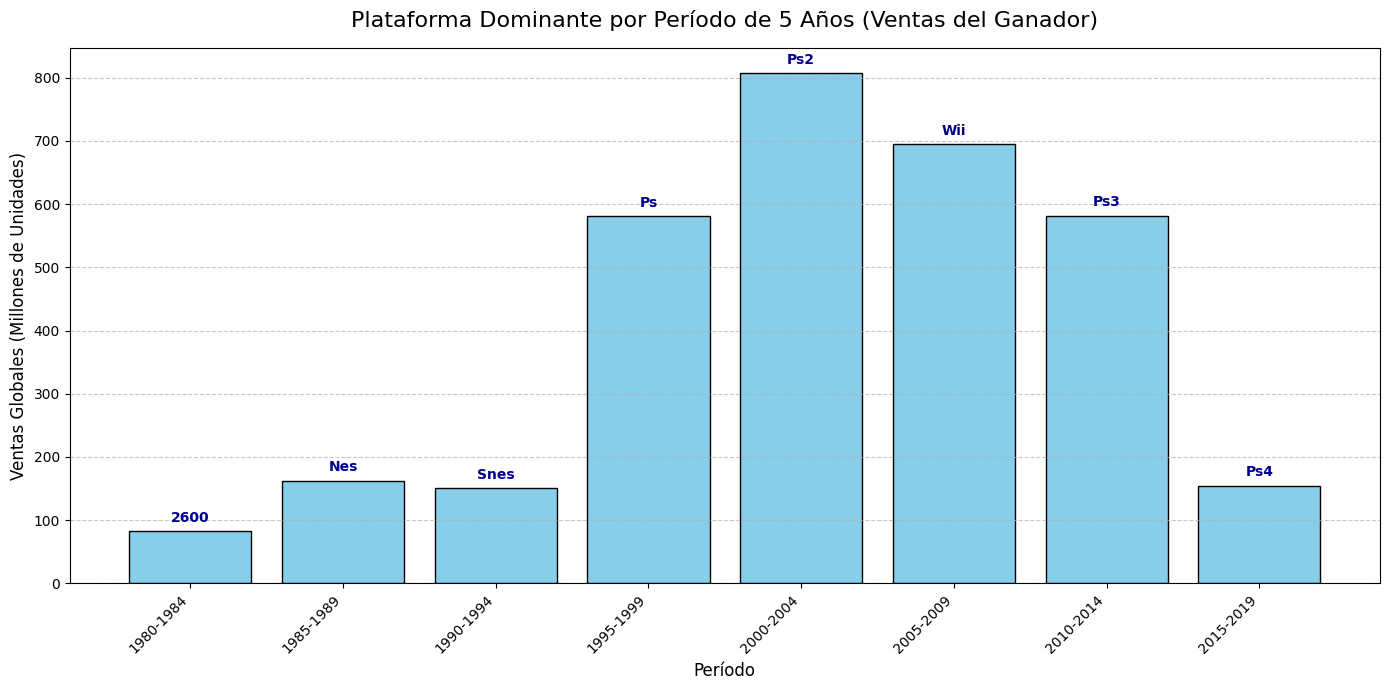

In [22]:
# Preparación de Datos
dominant_platform = dominant_platform.sort_values(by='Period')

# Extraemos las etiquetas y los valores para Matplotlib
periods = dominant_platform['Period'].astype(str).tolist()
sales = dominant_platform['Global_Sales'].tolist()
platforms = dominant_platform['Platform'].str.capitalize().tolist()

colors = ['skyblue'] * len(periods)


# Creación del gráfico
plt.figure(figsize=(14, 7))

plt.bar(
    periods,
    sales,
    color=colors,
    edgecolor='black'
)

for i, (platform_name, sale_value) in enumerate(zip(platforms, sales)):

    plt.text(
        i,
        sale_value + 10,
        platform_name,
        ha='center',
        va='bottom',
        fontsize=10,
        color='darkblue',
        weight='bold'
    )

plt.title('Plataforma Dominante por Período de 5 Años (Ventas del Ganador)', fontsize=16, pad=15)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Ventas Globales (Millones de Unidades)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()